## Importing the relevant libraries

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... - done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=f23409594ec17b6a345c7f473bf29a13c7c4635eec634d13ea54c37d9b13ff9f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!pip install tensorflow==2.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorflow-estimator
 

In [3]:
# import kaggle, zipfile, wget
# from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import wget, gc
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, Flatten
import tensorflow as tf
from keras.models import Model
from keras.utils import plot_model, to_categorical
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# api = KaggleApi()
# api.authenticate()

In [5]:
# api.competition_download_file('sentiment-analysis-on-movie-reviews','train.tsv.zip',path='./')
# api.competition_download_file('sentiment-analysis-on-movie-reviews','test.tsv.zip',path='./')

In [6]:
# with zipfile.ZipFile('train.tsv.zip','r') as zipref:
#     zipref.extractall('./')

In [7]:
# with zipfile.ZipFile('test.tsv.zip','r') as zipref:
#     zipref.extractall('./')

## Loading the dataset

In [8]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv',encoding='latin',header=None)
df.columns = ['sentiment','text']
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## Data Exploration

In [9]:
df.shape

(4846, 2)

In [10]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [11]:
df.duplicated().sum()

6

In [12]:
df = df.drop_duplicates()
df.shape

(4840, 2)

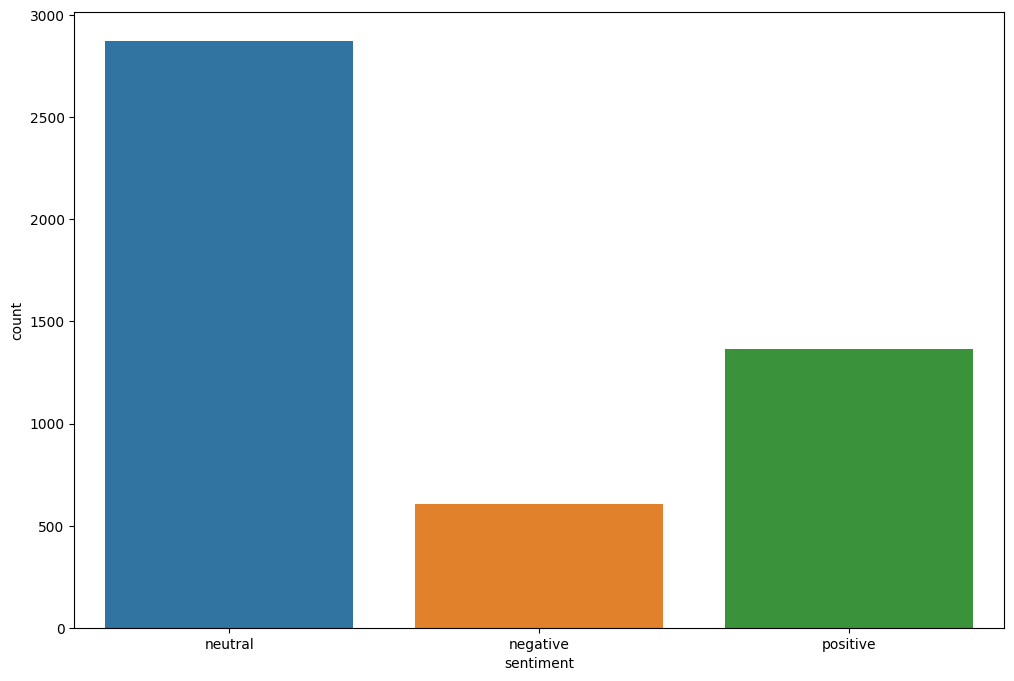

2962

In [13]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='sentiment',data=df)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

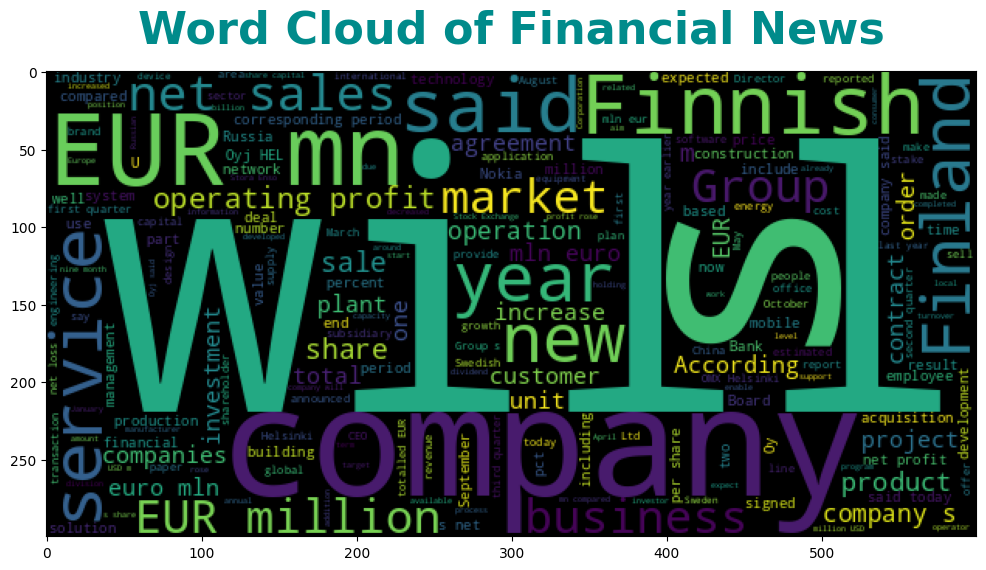

In [14]:
plt.figure(figsize=(12,8))
wc = WordCloud(width=600,height=300,random_state=101).generate(' '.join(df.text))
plt.title('Word Cloud of Financial News',fontsize=32,fontweight='bold',color='darkcyan',pad=20)
plt.imshow(wc);

/tmp/ipykernel_26/3580190778.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_words']);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


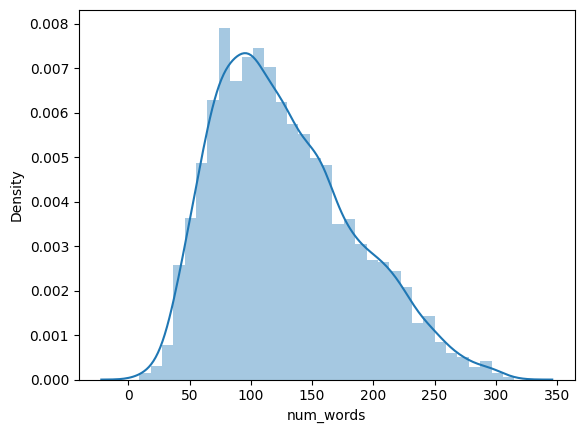

In [15]:
df['num_words'] = df.text.apply(len)
sns.distplot(df['num_words']);

In [16]:
df.num_words.describe()

count    4840.000000
mean      128.076446
std        56.416479
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: num_words, dtype: float64

In [17]:
max_len = 65

## Text Preprocessing

In [18]:
def clean_text(data,col):
    data[col] = data[col].apply(clean_html)
    data[col] = data[col].apply(remove_)
    data[col] = data[col].apply(remove_digits)
    data[col] = data[col].apply(remove_links)
    data[col] = data[col].apply(remove_special_characters)
    data[col] = data[col].apply(removeStopWords)
    data[col] = data[col].apply(punct)
    data[col] = data[col].apply(email_address)
    data[col] = data[col].apply(non_ascii)
    data[col] = data[col].apply(lower)
    return data

In [19]:
preprocessed_df = clean_text(df,'text')
preprocessed_df.head()

,sentiment,text,num_words
0,neutral,according gran company plans move production r...,127
1,neutral,technopolis plans develop stages area less squ...,190
2,negative,the international electronic industry company ...,228
3,positive,with new production plant company would increa...,206
4,positive,according company s updated strategy years bas...,203


## Encoding the target sentiment column

In [20]:
encoder = LabelEncoder()
preprocessed_df['sentiment'] = encoder.fit_transform(preprocessed_df['sentiment'])

## Splitting the dataset into train and test sets

In [21]:
train_df, validation_df = train_test_split(preprocessed_df,test_size=0.25,random_state=101,shuffle=True,stratify=preprocessed_df.sentiment)

## Downloading the pretrained Tokenizer class and the pretrained DistilBERT transformer model

In [22]:
model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"

tokenizer = AutoTokenizer.from_pretrained(model_name)
bert = TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=3,from_pt=True)

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a

## Performing text tokenization

In [23]:
X_train = tokenizer(text=train_df.text.tolist(),
                   max_length=max_len,
                   padding=True,
                   truncation=True,
                   add_special_tokens=True,
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   return_tensors='tf')

X_val = tokenizer(text=validation_df.text.tolist(),
                 max_length=max_len,
                 padding=True,
                 truncation=True,
                 add_special_tokens=True,
                 return_attention_mask=True,
                 return_token_type_ids=False,
                 return_tensors='tf')

## Fine-tuning the DistilBERT-base-uncased model architecture

In [24]:
input_ids = Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
attention_mask = Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

In [25]:
embeddings = bert(input_ids,attention_mask=attention_mask)[0] # 0 -> final hidden state, 1 -> pooling output
output = Flatten()(embeddings)
output = Dense(units=256,activation='relu')(output)
output = Dropout(0.3)(output)
output = Dense(units=128,activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(units=64,activation='relu')(output)
output = Dropout(0.1)(output)
output = Dense(units=32,activation='relu')(output)
output = Dense(units=3,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_mask],outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 65)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 65)]         0           []                               
                                                                                                  
 tf_roberta_for_sequence_classi  TFSequenceClassifie  82120707   ['input_ids[0][0]',              
 fication (TFRobertaForSequence  rOutput(loss=None,               'attention_mask[0][0]']         
 Classification)                logits=(None, 3),                                                 
                                 hidden_states=None                                           

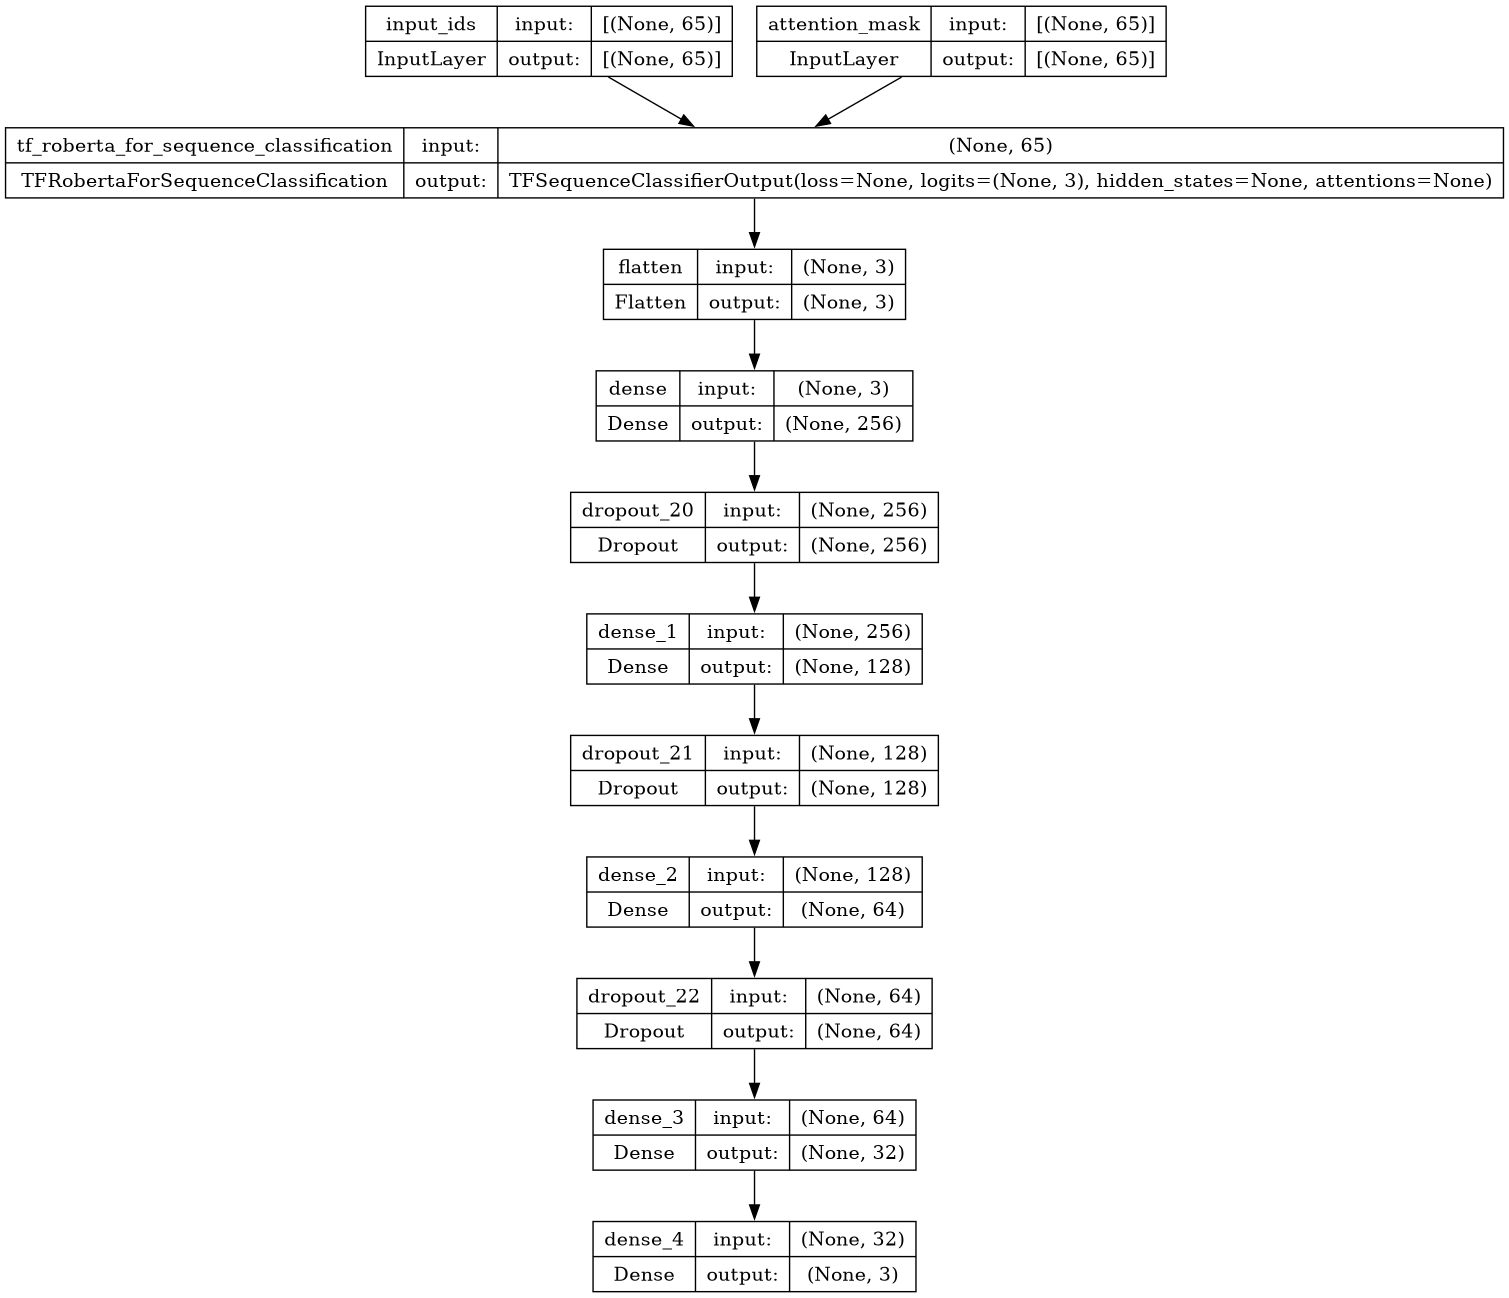

In [26]:
plot_model(model,'model.png',show_shapes=True,dpi=100)

In [27]:
optimizer = Adam(learning_rate=4e-5,epsilon=2e-8,clipnorm=1.0,decay=1e-2)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=SparseCategoricalAccuracy('balanced_accuracy'))

In [28]:
def time_based_decay(epoch, lr):
    decay_rate = 0.1
    decay_step = 20
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

es = EarlyStopping(monitor='val_balanced_accuracy',patience=20,verbose=1,mode='max')
mc = ModelCheckpoint(filepath='financial_news_sentiment_predictor.h5',monitor='val_balanced_accuracy',mode='max',save_best_only=True,verbose=1)
lrs = LearningRateScheduler(time_based_decay)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
              y=train_df.sentiment,
              epochs=50,
              batch_size=32,
              validation_data=({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']},validation_df.sentiment),
              callbacks=[es,mc,lrs]
             )

Epoch 1/50
114/114 [==============================] - ETA: 0s - loss: 0.9406 - balanced_accuracy: 0.5675
Epoch 1: val_balanced_accuracy improved from -inf to 0.76942, saving model to financial_news_sentiment_predictor.h5
114/114 [==============================] - 473s 4s/step - loss: 0.9406 - balanced_accuracy: 0.5675 - val_loss: 0.6922 - val_balanced_accuracy: 0.7694 - lr: 4.0000e-05
Epoch 2/50
114/114 [==============================] - ETA: 0s - loss: 0.6820 - balanced_accuracy: 0.7452
Epoch 2: val_balanced_accuracy improved from 0.76942 to 0.80909, saving model to financial_news_sentiment_predictor.h5
114/114 [==============================] - 452s 4s/step - loss: 0.6820 - balanced_accuracy: 0.7452 - val_loss: 0.5857 - val_balanced_accuracy: 0.8091 - lr: 4.0000e-05
Epoch 3/50
114/114 [==============================] - ETA: 0s - loss: 0.5717 - balanced_accuracy: 0.8017
Epoch 3: val_balanced_accuracy improved from 0.80909 to 0.81157, saving model to financial_news_sentiment_predictor.

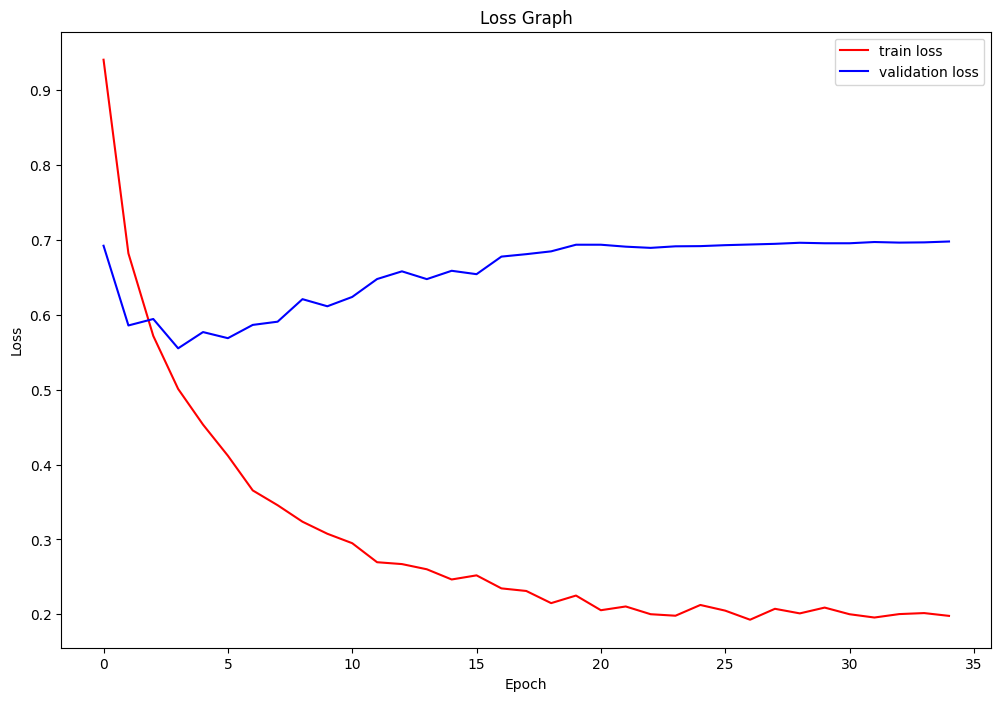

In [29]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

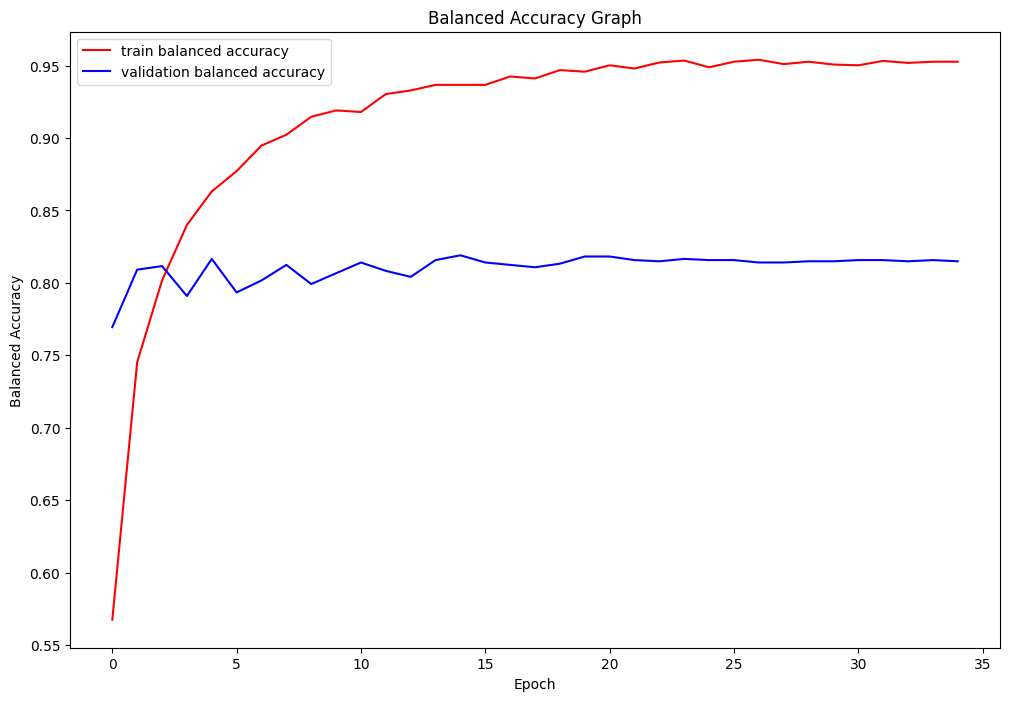

In [30]:
plt.figure(figsize=(12,8))
plt.plot(r.history['balanced_accuracy'],'r',label='train balanced accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='validation balanced accuracy')
plt.xlabel('Epoch')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy Graph')
plt.legend();

In [31]:
loss, acc = model.evaluate({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']},validation_df.sentiment)
print("Sparse Categorical Crossentropy Loss:", round(loss,2))
print("Sparse Categorical Accuracy (Balanced): ", round(acc*100,2),'%')

38/38 [==============================] - 38s 995ms/step - loss: 0.6979 - balanced_accuracy: 0.8149
Sparse Categorical Crossentropy Loss: 0.7
Sparse Categorical Accuracy (Balanced):  81.49 %


38/38 [==============================] - 39s 971ms/step
Confusion Matrix:


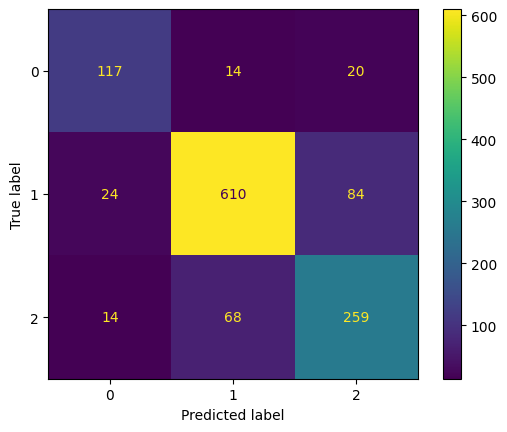

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       151
           1       0.88      0.85      0.87       718
           2       0.71      0.76      0.74       341

    accuracy                           0.81      1210
   macro avg       0.78      0.79      0.79      1210
weighted avg       0.82      0.81      0.82      1210



In [32]:
validation_pred = model.predict({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']})
validation_pred = np.argmax(validation_pred,axis=1)
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(validation_df.sentiment,validation_pred)
plt.show()
print("Classification Report:")
print(classification_report(validation_df.sentiment,validation_pred))